# Restuarant Complexity
Combine the products/ingredients dataset with the restaurant dataset to understand how product mix varies by location

In [1]:
import sweetgreen as sg
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Business Questions
* How is product mix selected? For example the 8th-hill location in Los Angeles has way more beverages (13!) than most other locations 
* How is it decided when options will appear online? For example I bought a plate in person from the Culver City Lab but it does not appear online
* Why is steelhead not marked as meat? https://order.sweetgreen.com/sweetgreen-brink-demo/menu

# Notes
* Some products are out of stock and can't be ordered. Not sure if that is true throughout the day or if that is a temporary condition depending on ingredient availability

In [2]:
restaurants = sg.utils.read_json("../data/cleaned/flattened_restaurants.json")
restaurant_df = pd.DataFrame(restaurants)

restaurant_df.shape

(207, 50)

In [3]:
restaurant_df.iloc[0]

Fri_end                                                                     22:00
Fri_start                                                                   10:30
Mon_end                                                                     22:00
Mon_start                                                                   10:30
Sat_end                                                                     22:00
Sat_start                                                                   10:30
Sun_end                                                                     22:00
Sun_start                                                                   10:30
Thu_end                                                                     22:00
Thu_start                                                                   10:30
Tue_end                                                                     22:00
Tue_start                                                                   10:30
Wed_end         

## Determine location complexity
Iterate through restaurants and ingredients to understand which restaurants have the most ingredeients and the most products

In [4]:
# list(restaurant_details.items())[0]
restaurant_details = sg.utils.read_json("../data/cleaned/indexed_restaurant_products.json")

restaurant_product_ingred = []
for menu_id, products in restaurant_details.items():
    restaurant_dict = {"menu_id":int(menu_id)}
    
    ingredients = set()
    for product in products:
        
        # Get count of product types
        product_category = product["category_name"]
        restaurant_dict[product_category]= restaurant_dict.get(product_category, 0) + 1
        
        # Add to restaurant set of ingredients
        ingredients.update(product["ingredient_ids"])
    
    restaurant_dict["Ingredient_Count"] = len(ingredients)
    restaurant_product_ingred.append(restaurant_dict)
restaurant_product_ingred[:5]

[{'menu_id': 161, 'salads': 10, 'warm bowls': 7, 'Ingredient_Count': 58},
 {'menu_id': 70,
  'beverages': 10,
  'warm bowls': 7,
  'salads': 10,
  'Ingredient_Count': 59},
 {'menu_id': 27,
  'beverages': 11,
  'warm bowls': 7,
  'salads': 10,
  'Ingredient_Count': 59},
 {'menu_id': 141, 'warm bowls': 7, 'salads': 10, 'Ingredient_Count': 58},
 {'menu_id': 121, 'warm bowls': 7, 'salads': 10, 'Ingredient_Count': 58}]

In [5]:
df_counts = pd.DataFrame(restaurant_product_ingred).fillna(0)

In [6]:
df_counts.head()

,Ingredient_Count,beverages,menu_id,plates,salads,sides,warm bowls
0,58,0.0,161,0.0,10,0.0,7
1,59,10.0,70,0.0,10,0.0,7
2,59,11.0,27,0.0,10,0.0,7
3,58,0.0,141,0.0,10,0.0,7
4,58,0.0,121,0.0,10,0.0,7


In [7]:
df_counts.shape

(207, 7)

In [8]:
restaurant_df_subset = restaurant_df.loc[~restaurant_df["hidden"], ["menu_id", "is_outpost", "state", "city", "restaurant_slug"]]
print(restaurant_df_subset.shape)
restaurant_df_subset.head()

(186, 5)


,menu_id,is_outpost,state,city,restaurant_slug
0,1,False,DC,Washington,dupont
1,2,False,MD,Bethesda,bethesda
2,3,False,DC,Washington,capitol-hill
3,4,False,VA,Reston,reston
4,5,False,VA,Arlington,ballston


In [9]:
df_merged = df_counts.merge(restaurant_df_subset, right_on="menu_id", left_on="menu_id").set_index("menu_id")

In [10]:
print(df_merged.shape)
df_merged.head()

(186, 10)


,Ingredient_Count,beverages,plates,salads,sides,warm bowls,is_outpost,state,city,restaurant_slug
menu_id,,,,,,,,,,
161,58,0.0,0.0,10,0.0,7,True,NY,New York,gizmodo-media
70,59,10.0,0.0,10,0.0,7,False,NY,Brooklyn,dumbo
27,59,11.0,0.0,10,0.0,7,False,DC,Washington,logan-circle
141,58,0.0,0.0,10,0.0,7,False,NY,Brooklyn,court-atlantic
121,58,0.0,0.0,10,0.0,7,True,DC,Washington,820-dc


In [11]:
df_merged.columns

Index(['Ingredient_Count', 'beverages', 'plates', 'salads', 'sides',
       'warm bowls', 'is_outpost', 'state', 'city', 'restaurant_slug'],
      dtype='object')

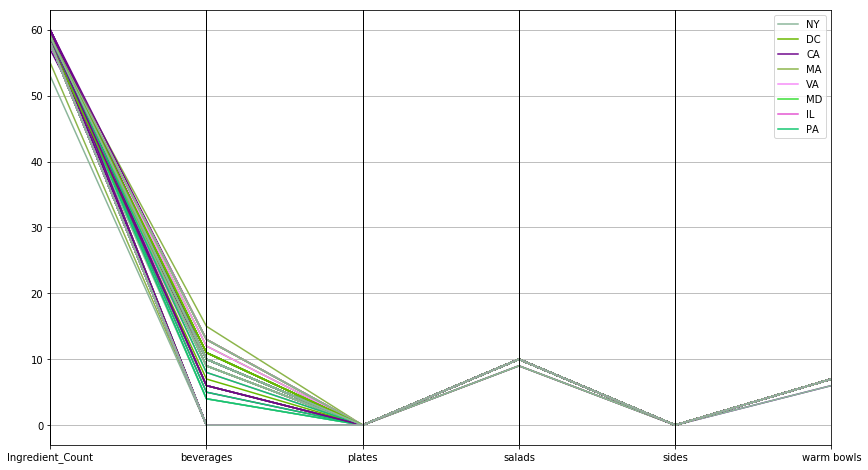

In [12]:
fig, ax = plt.subplots(figsize=(14,8))
relevant_cols = ['Ingredient_Count', 'beverages', 'plates', 'salads', 'sides', 'warm bowls', 'state']
parallel_coordinates(df_merged[relevant_cols], "state", ax=ax)

## Ingredient Analysis
Get a sense of which restaurants need to make the most things

In [30]:
df_merged.sort_values(by="Ingredient_Count", ascending=False)

,Ingredient_Count,beverages,plates,salads,sides,warm bowls,is_outpost,state,city,restaurant_slug
menu_id,,,,,,,,,,
62,60,10.0,0.0,10,0.0,7,False,CA,Los Angeles,brentwood
153,60,0.0,0.0,10,0.0,7,True,CA,Culver City,wework-one-culver
104,60,13.0,0.0,10,0.0,7,False,CA,Los Angeles,8th-hill
156,60,0.0,0.0,10,0.0,7,True,CA,Culver City,culver-1-8600-hayden
74,60,6.0,0.0,10,0.0,7,False,CA,West Hollywood,sunset-strip
163,60,0.0,0.0,10,0.0,7,True,CA,Los Angeles,culver-9-5500-w-jefferson
38,60,10.0,0.0,10,0.0,7,False,CA,Los Angeles,hollywood-sunset-gower
85,60,9.0,0.0,10,0.0,7,False,CA,Marina del Rey,marina-del-rey
132,60,0.0,0.0,10,0.0,7,True,MA,Boston,wayfair


In [31]:
# Analyze Location products (Restaurant)

def product_analyzer(restaurant_id, restaurant_details):
    """Get relevant details out of product json"""
    products_minimal = []
    
    for product in restaurant_details[restaurant_id]:
        products_minimal.append((product["category_name"], product["name"], product["out_of_stock"]))
        
    products_minimal.sort(key = lambda x :x[0])
        
    return products_minimal

In [32]:
product_analyzer("60", restaurant_details)

[('beverages', 'spiced cider', False),
 ('beverages', 'kale gingerade', False),
 ('beverages', 'hibiscus tea', False),
 ('beverages', 'lemon tangerine fresca', True),
 ('beverages', 'chai iced tea', False),
 ('beverages', 'chamomile mint iced tea', True),
 ('beverages', 'cucumber ginger lime fresca', True),
 ('beverages', 'spindrift grapefruit', True),
 ('beverages', 'spindrift raspberry lime', True),
 ('beverages', 'still water (open)', False),
 ('beverages', 'sparkling water (open)', False),
 ('salads', 'buffalo chicken bowl', False),
 ('salads', 'winter maple squash salad', False),
 ('salads', 'buffalo chickpea (OLO)', False),
 ('salads', 'kale caesar', False),
 ('salads', 'hummus tahina (new)  ', False),
 ('salads', 'guacamole greens', False),
 ('salads', 'spicy thai salad', False),
 ('salads', 'lentil + avocado', True),
 ('salads', 'create your own', False),
 ('warm bowls', 'miso bowl', False),
 ('warm bowls', 'roasted squash + blue cheese (OLO)', False),
 ('warm bowls', 'hollywoo

# Plates Analysis
Some of the restaurants seem to be testing plates. 

In [37]:
df_counts.sort_values(by="plates").tail()

,Ingredient_Count,beverages,menu_id,plates,salads,sides,warm bowls
64,58,0.0,133,0.0,10,0.0,7
206,58,0.0,119,0.0,10,0.0,7
137,56,11.0,187,3.0,9,2.0,7
199,61,19.0,32,3.0,13,2.0,11
54,60,9.0,106,3.0,10,2.0,7


In [47]:
restaurant_df.loc[restaurant_df["menu_id"].isin([106, 32, 187]), ["restaurant_slug", "hidden", "city", "address"]]

,restaurant_slug,hidden,city,address
31,sweetgreen-brink-demo,True,New York,26 Broadway
105,west-adams-delivery-kitchen,True,Los Angeles,1842 W Washington Blvd
186,demo-four,True,New York,168 E. Broadway


In [44]:
product_analyzer("54", restaurant_details)

[('beverages', 'spiced cider', False),
 ('beverages', 'chai iced tea', False),
 ('beverages', 'chamomile mint iced tea', False),
 ('beverages', 'cucumber ginger lime fresca', False),
 ('beverages', 'jasmine green iced tea', False),
 ('beverages', 'lemon fresca', False),
 ('beverages', 'spindrift grapefruit', False),
 ('beverages', 'spindrift raspberry lime', False),
 ('beverages', 'still water (open)', False),
 ('beverages', 'sparkling water (open)', False),
 ('salads', 'buffalo chicken bowl', True),
 ('salads', 'winter maple squash salad', False),
 ('salads', 'buffalo chickpea (OLO)', True),
 ('salads', 'italian chopped salad', True),
 ('salads', 'kale caesar', False),
 ('salads', 'hummus tahina (new)  ', False),
 ('salads', 'guacamole greens', False),
 ('salads', 'spicy thai salad', False),
 ('salads', 'lentil + avocado', True),
 ('salads', 'create your own', False),
 ('warm bowls', 'miso bowl', False),
 ('warm bowls', 'roasted squash + blue cheese (OLO)', True),
 ('warm bowls', 'har